### SKlearn Regression Example via real dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
# load data
df = pd.read_csv('houses.csv')
df.columns = df.columns.str.lower()

In [41]:
# separate data for features and targets
x = df.drop(columns=['price'])  # all instead of price
y = df['price']

In [42]:
# 3. features with number datatype
x_numeric = x.select_dtypes(include=[np.number])

In [43]:
# separate data to test and prod examples
(      x_train
     , x_test
     , y_train
     , y_test) = train_test_split(x_numeric
                                  , y
                                  , test_size=0.2
                                  , random_state=42)


In [44]:
# create and teach linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [45]:
# prediction with test data
y_pred = model.predict(x_test)

In [46]:
# valuate a model (rmse)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
average_prediction = np.mean(y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 4279555.47


In [47]:
# coefficients output
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))

                Feature   Coefficient
31            microwave -2.242588e+06
32           golfcourse -1.768599e+06
1       no. of bedrooms -1.705147e+06
23       washingmachine  1.309647e+06
3      maintenancestaff -1.289087e+06
29                  bed  1.272396e+06
35                 sofa -1.212060e+06
2                resale  1.210315e+06
6     landscapedgardens  1.039149e+06
14            clubhouse  1.024759e+06
16         24x7security -9.603603e+05
25                   ac  9.227762e+05
4             gymnasium -9.004073e+05
12       sportsfacility -8.570953e+05
13                  atm  7.875113e+05
21     multipurposeroom  7.869708e+05
15               school -7.768906e+05
20            cafeteria  7.705138e+05
22             hospital  7.123179e+05
33                   tv  7.051232e+05
26                 wifi  5.863795e+05
17          powerbackup  5.656167e+05
8   rainwaterharvesting -5.500656e+05
24        gasconnection  5.381763e+05
28        liftavailable -5.011756e+05
9           

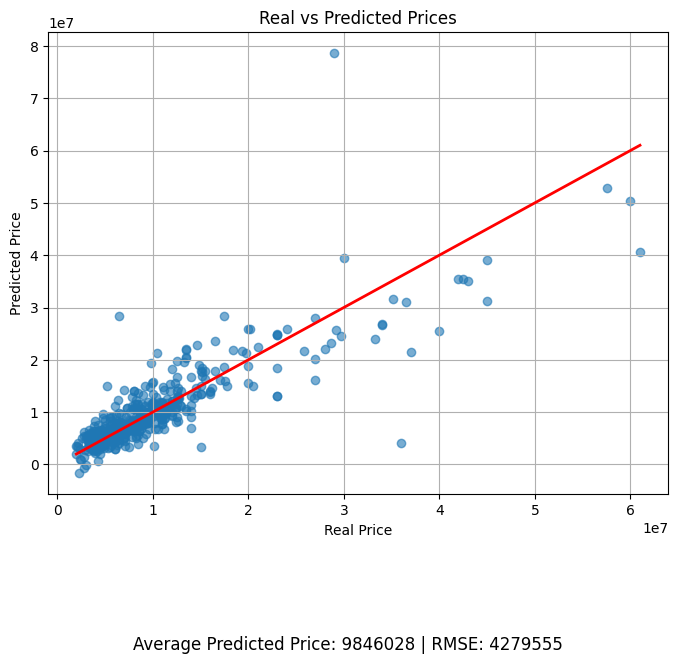

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Real vs Predicted Prices')
plt.grid(True)
plt.figtext(0.5, -0.15, f'Average Predicted Price: {average_prediction:.0f} | RMSE: {rmse:.0f}', ha='center', fontsize=12)
plt.show()

In [51]:
errors = []

steps = np.linspace(0.01, 1.0, 500)

for percent in steps:
    idx = max(1, int(percent * len(x_train)))  # Минимум 1 точка
    model_partial = LinearRegression()
    model_partial.fit(x_train[:idx], y_train[:idx])
    y_pred_partial = model_partial.predict(x_test)
    mse_partial = mean_squared_error(y_test, y_pred_partial)
    errors.append(np.sqrt(mse_partial))

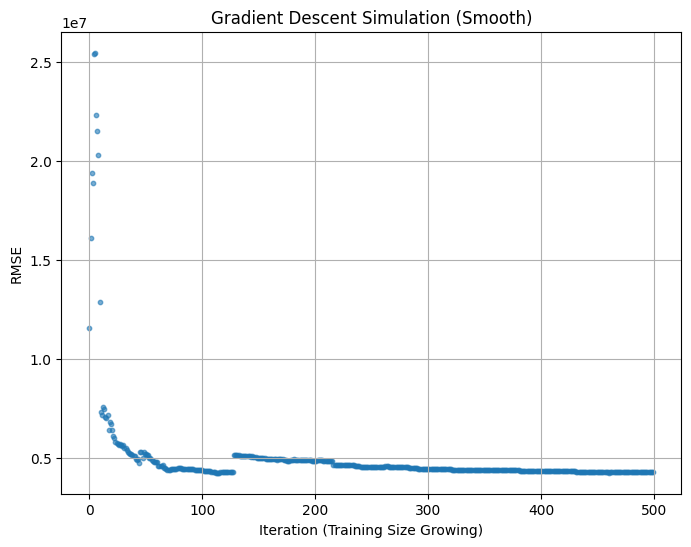

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(errors)), errors, s=10, alpha=0.6)
plt.xlabel('Iteration (Training Size Growing)')
plt.ylabel('RMSE')
plt.title('Gradient Descent Simulation (Smooth)')
plt.grid(True)
plt.show()